In [1]:
from keras.optimizers import Adam, SGD
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, DepthwiseConv2D, AveragePooling2D, Activation,InputLayer
from keras.layers import BatchNormalization, Dropout
from keras import backend
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
from keras.utils import to_categorical
from utils.model import *
from keras.optimizers import SGD, RMSprop, Adam, Nadam
import matplotlib.pyplot as plt

In [3]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

Training MobileNet on CIFAR-10 Dataset with different alpha

### I. $\alpha = 1$ 

In [13]:
model = mobilenet(x_train.shape[1:],10, alpha = 1)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1250/1250 [==============================] - 136s 105ms/step - loss: 1.9474 - accuracy: 0.2929 - val_loss: 3.0528 - val_accuracy: 0.2897
Epoch 2/10
1250/1250 [==============================] - 136s 109ms/step - loss: 1.6585 - accuracy: 0.4147 - val_loss: 2.1645 - val_accuracy: 0.4015
Epoch 3/10
1250/1250 [==============================] - 136s 109ms/step - loss: 1.4934 - accuracy: 0.4858 - val_loss: 1.6247 - val_accuracy: 0.4488
Epoch 4/10
1250/1250 [==============================] - 140s 112ms/step - loss: 1.3253 - accuracy: 0.5440 - val_loss: 1.8358 - val_accuracy: 0.5126
Epoch 5/10
1250/1250 [==============================] - 142s 113ms/step - loss: 1.2153 - accuracy: 0.5857 - val_loss: 1.2492 - val_accuracy: 0.5797
Epoch 6/10
1250/1250 [==============================] - 137s 110ms/step - loss: 1.1210 - accuracy: 0.6161 - val_loss: 1.1537 - val_accuracy: 0.6087
Epoch 7/10
1250/1250 [==============================] - 138s 110ms/step - loss: 1.0525 - accuracy: 0.6395 - val_

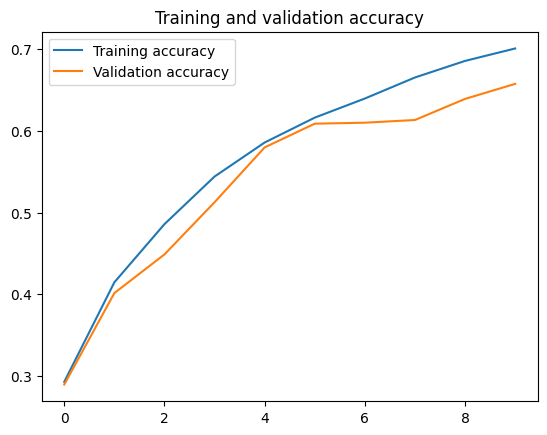

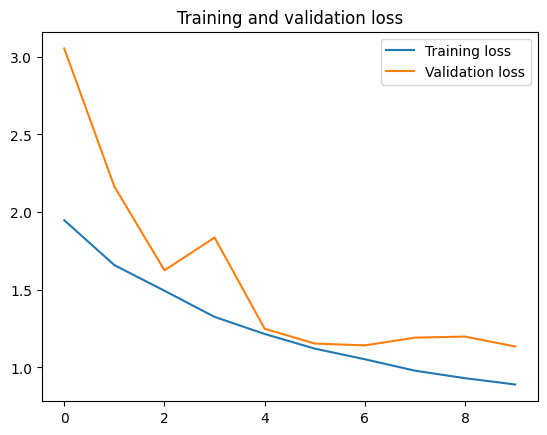

In [15]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
model.save('CIFAR_1.h5')

### II. $\alpha = 0.75$ 

In [13]:
model = mobilenet(x_train.shape[1:],10, alpha = 0.75)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1250/1250 [==============================] - 60s 45ms/step - loss: 1.9300 - accuracy: 0.2988 - val_loss: 2.0180 - val_accuracy: 0.3509
Epoch 2/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.6034 - accuracy: 0.4308 - val_loss: 1.6786 - val_accuracy: 0.4632
Epoch 3/10
1250/1250 [==============================] - 62s 50ms/step - loss: 1.4326 - accuracy: 0.4998 - val_loss: 6.6379 - val_accuracy: 0.4753
Epoch 4/10
1250/1250 [==============================] - 61s 49ms/step - loss: 1.3375 - accuracy: 0.5451 - val_loss: 1.3503 - val_accuracy: 0.5564
Epoch 5/10
1250/1250 [==============================] - 62s 49ms/step - loss: 1.2487 - accuracy: 0.5781 - val_loss: 1.5819 - val_accuracy: 0.5710
Epoch 6/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.1752 - accuracy: 0.6066 - val_loss: 1.6145 - val_accuracy: 0.5455
Epoch 7/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.0814 - accuracy: 0.6292 - val_loss: 1.0964 -

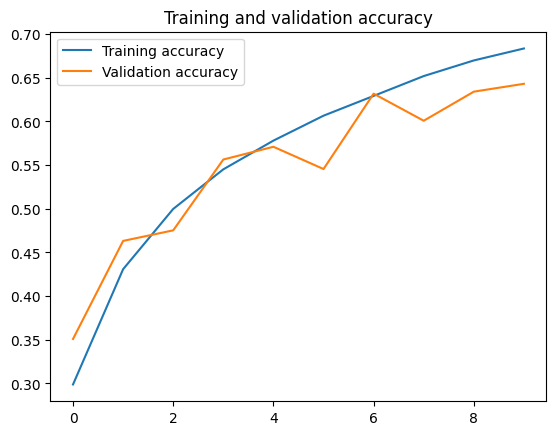

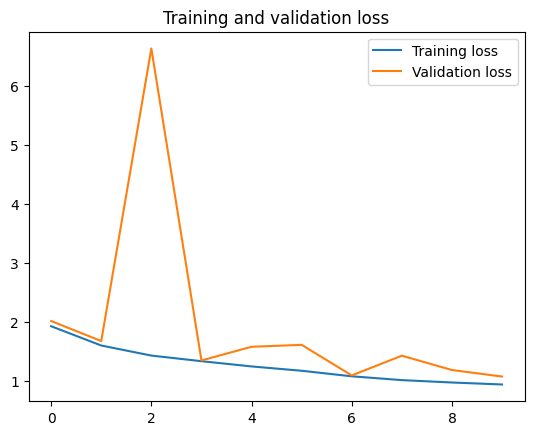

In [14]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.save('CIFAR_0.75.h5')

### III. $\alpha = 0.5$ 

In [16]:
model = mobilenet(x_train.shape[1:],10, alpha = 0.5)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1250/1250 [==============================] - 45s 33ms/step - loss: 1.9595 - accuracy: 0.2788 - val_loss: 2.3855 - val_accuracy: 0.3094
Epoch 2/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.6377 - accuracy: 0.4151 - val_loss: 1.6349 - val_accuracy: 0.4222
Epoch 3/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.4953 - accuracy: 0.4742 - val_loss: 1.5078 - val_accuracy: 0.4539
Epoch 4/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.4058 - accuracy: 0.5152 - val_loss: 1.5177 - val_accuracy: 0.5460
Epoch 5/10
1250/1250 [==============================] - 43s 35ms/step - loss: 1.3161 - accuracy: 0.5477 - val_loss: 1.9280 - val_accuracy: 0.5091
Epoch 6/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.2206 - accuracy: 0.5797 - val_loss: 2.2125 - val_accuracy: 0.5155
Epoch 7/10
1250/1250 [==============================] - 44s 36ms/step - loss: 1.1601 - accuracy: 0.6081 - val_loss: 1.1648 -

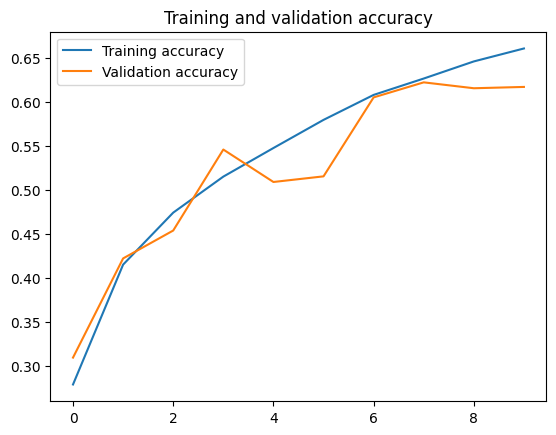

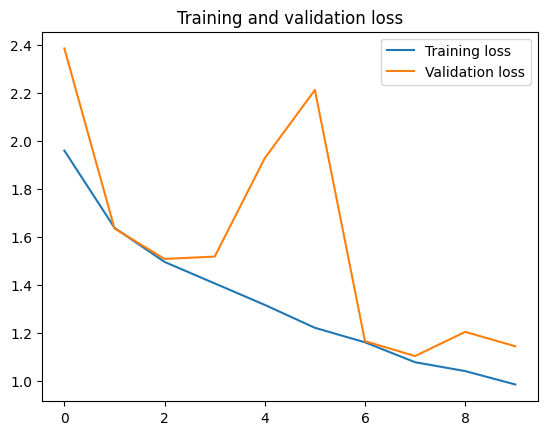

In [17]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
print(np.mean(acc))

0.5352874994277954


In [19]:
model.save('CIFAR_0.5.h5')

### IV. $\alpha = 0.25$ 

In [11]:
model = mobilenet(x_train.shape[1:],10, alpha = 0.25)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1250/1250 [==============================] - 35s 25ms/step - loss: 2.1023 - accuracy: 0.2121 - val_loss: 2.2259 - val_accuracy: 0.2796
Epoch 2/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.7525 - accuracy: 0.3443 - val_loss: 1.7048 - val_accuracy: 0.3732
Epoch 3/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6247 - accuracy: 0.4007 - val_loss: 1.6930 - val_accuracy: 0.3916
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5190 - accuracy: 0.4474 - val_loss: 1.5859 - val_accuracy: 0.4477
Epoch 5/10
1250/1250 [==============================] - 31s 24ms/step - loss: 1.4426 - accuracy: 0.4800 - val_loss: 1.5304 - val_accuracy: 0.4800
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3767 - accuracy: 0.5111 - val_loss: 1.3726 - val_accuracy: 0.5213
Epoch 7/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3057 - accuracy: 0.5356 - val_loss: 1.3450 -

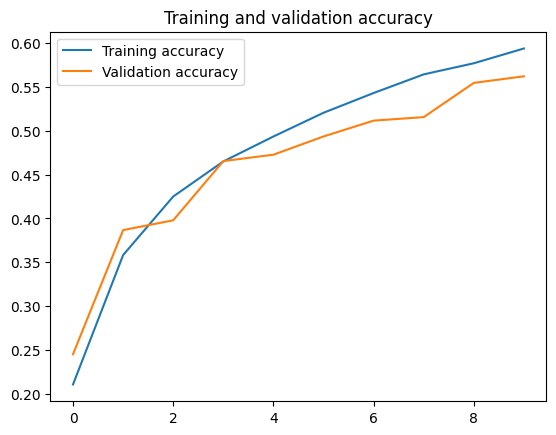

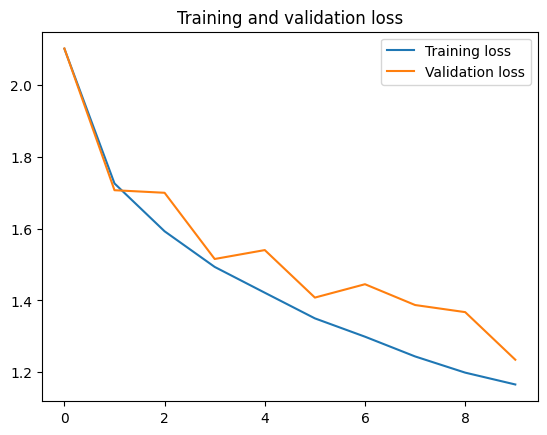

In [21]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model.save('CIFAR_0.25.h5')

$ Model Structure$

In [10]:
pip install netron

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [12]:
model.save('test.h5')
!pip install netron
import netron
netron.start('test.h5', 8081)

Serving 'test.h5' at http://localhost:8081


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


('localhost', 8081)

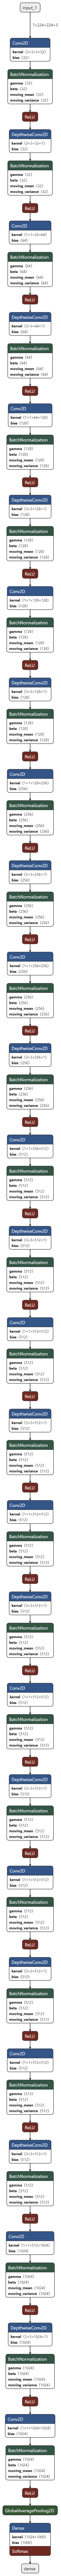

In [13]:
repetitions = 10
input = np.random.randn(1, *input_shape)

output = model.predict(input)
start = time()
for _ in range(repetitions):
  output = model.predict(input)
  
print((time() - start) / repetitions)

1/1 [==============================] - 0s 31ms/step
0.05149998664855957
